In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

# charger les données
data = pd.read_csv('http://factominer.free.fr/factomethods/datasets/decathlon.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

In [8]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [5]:
from sklearn import decomposition

In [6]:
pca = decomposition.PCA(n_components=2)

In [9]:
pca.fit(X_scaled)

PCA(n_components=2)

In [10]:
print(pca.explained_variance_ratio_)

[0.32719055 0.1737131 ]


In [28]:
data.index

Index(['SEBRLE', 'CLAY', 'KARPOV', 'BERNARD', 'YURKOV', 'WARNERS', 'ZSIVOCZKY',
       'McMULLEN', 'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON',
       'Sebrle', 'Clay', 'Karpov', 'Macey', 'Warners', 'Zsivoczky', 'Hernu',
       'Nool', 'Bernard', 'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras',
       'Smith', 'Averyanov', 'Ojaniemi', 'Smirnov', 'Qi', 'Drews',
       'Parkhomenko', 'Terek', 'Gomez', 'Turi', 'Lorenzo', 'Karlivans',
       'Korkizoglou', 'Uldal', 'Casarsa'],
      dtype='object')

In [11]:
X_projected = pca.transform(X_scaled)

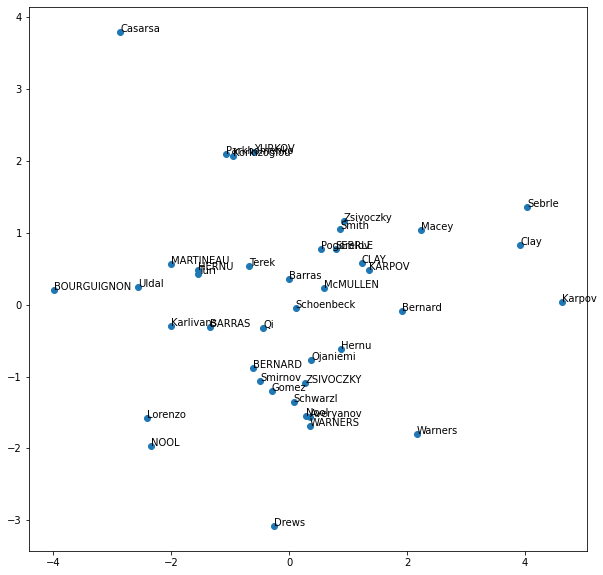

In [14]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0],X_projected[:,1])

for i, (x,y) in enumerate(zip(X_projected[:,0],X_projected[:,1])):
    plt.text(x,y,data.index[i])


In [15]:
pcs = pca.components_

Text(0, 0.5, 'PC 2')

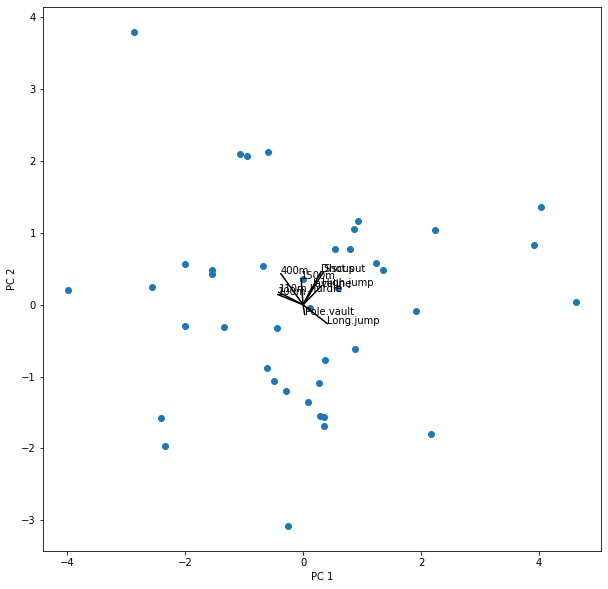

In [23]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0],X_projected[:,1])

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    plt.plot([0, x],[0, y], color='k')
    plt.text(x,y,data.columns[i])

plt.xlabel('PC 1')
plt.ylabel('PC 2')



In [11]:
import pandas as pd
data_2 = pd.read_excel("data_example.xlsx",index_col=0)

In [12]:
from sklearn import preprocessing

# éliminer les colonnes que nous n'utiliserons pas
my_data2 = data_2.drop(['Sexe'], axis=1)

# transformer les données en array numpy
X2 = my_data2.values
std_scale2 = preprocessing.StandardScaler().fit(X2)
X_scaled2 = std_scale2.transform(X2)

In [17]:
from sklearn import decomposition
pca2 = decomposition.PCA()
coords2 = pca2.fit_transform(X_scaled2)
print(pca2.explained_variance_ratio_)

[0.95164966 0.04835034]


In [18]:
coords2

array([[ 0.62224485,  0.41818547],
       [ 1.36640246,  0.26018579],
       [-1.99724246, -0.01034844],
       [-1.25308486, -0.16834812],
       [ 0.18863825,  0.50009731],
       [ 2.52669463,  0.38944106],
       [ 0.24105437, -0.60740308],
       [-0.75503845, -0.31469977],
       [ 1.73556926,  0.24271375],
       [-2.39552933,  0.62240159],
       [ 0.17079055, -0.41990767],
       [ 1.40134654, -0.4781478 ],
       [ 2.54999068, -0.10278133],
       [-0.77251049,  0.05446702],
       [-1.20611709,  0.13637887],
       [-0.41499172,  0.28310618],
       [ 0.5811011 , -0.00959712],
       [ 1.1377633 , -0.09733298],
       [ 1.50110609,  0.00825058],
       [ 0.10052673, -0.23241227],
       [-1.55781185, -0.21531589],
       [-0.87809405, -0.30887576],
       [-1.25890887, -0.04529252],
       [-1.63389968,  0.09523512]])

In [44]:
X_projected2 = pca2.transform(X_scaled2)

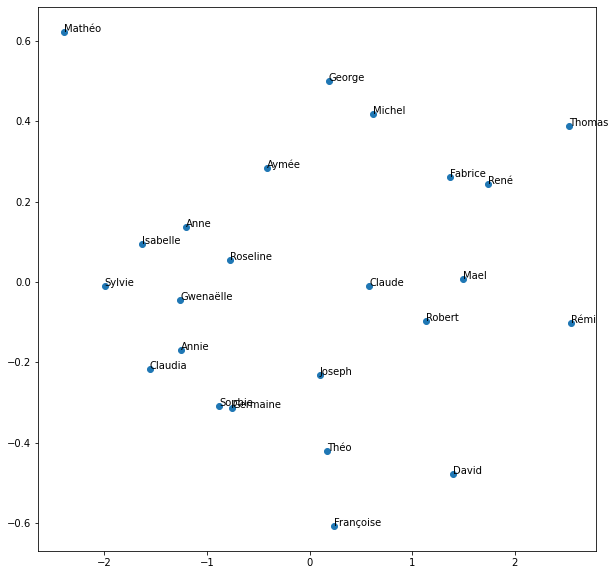

In [46]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_projected2[:,0],X_projected2[:,1])

for i, (x,y) in enumerate(zip(X_projected2[:,0],X_projected2[:,1])):
    plt.text(x,y,data_2.index[i])

In [41]:
pcs2 = pca2.components_
print(pcs2)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [51]:
pca2.explained_variance_

array([1.98605147, 0.10090505])

# ACP tutoriel Tanagra

In [3]:
import pandas
#version
print(pandas.__version__) # 0.23.0
#chargement de la première feuille de données
X = pandas.read_excel("autos_acp_pour_python.xlsx",sheet_name=0,header=0,index_col=0)

1.2.3


In [20]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [6]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))
#écart-type
print(numpy.std(Z,axis=0,ddof=0))


[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
[1. 1. 1. 1. 1. 1.]


In [7]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [8]:
#calculs
coord = acp.fit_transform(Z) # coordonnées dans le nouvel espace
#nombre de composantes calculées
print(acp.n_components_) # 6

6


In [19]:
#variance expliquée
print(acp.explained_variance_)


[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [22]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [23]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


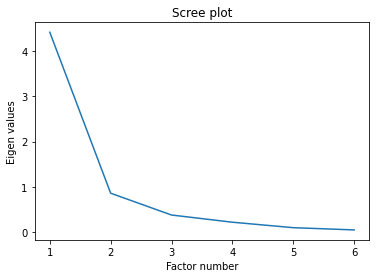

In [26]:
#scree plot
import matplotlib.pyplot as plt
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

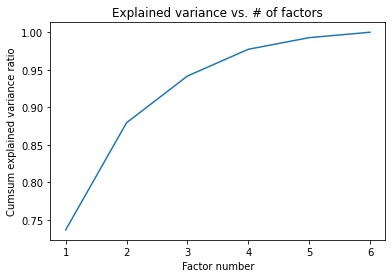

In [27]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


### Les coordonnées factorielles (Fik) des individus ont été collectées dans la variable coord
### Nous les positionnons dans le premier plan 
### factoriel avec leurs labels pour situer et comprendre les proximités entre les véhicules.

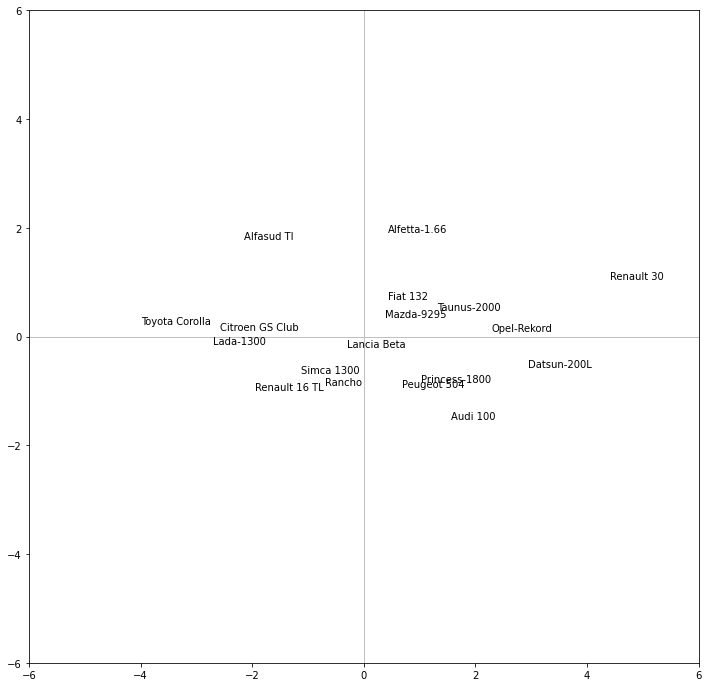

In [28]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


#### Qualité de représentation – Les COS² (cosinus carré). Pour calculer la qualité de 
#### représentation des individus sur les axes, nous devons d’abord calculer les carrés des
#### distances à l’origine des individus, qui correspondent également à leur contribution dans 
#### l’inertie totale 𝑑𝑖  = ∑j=1 à p (Zij*Zij)

In [31]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))


                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


In [32]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9295  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


In [37]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Contribution des individus aux axes (CTR). Elles permettent de déterminer les 
### individus qui pèsent le plus dans la définition de chaque facteur.


In [38]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])
 
print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9295  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


In [39]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))


[1. 1. 1. 1. 1. 1.]


### Représentation des variables – Outils pour l’aide à l’interprétation
### Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le 
### champ .components_


In [40]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [ ]:
les facteurs sont en ligne, les variables en 
colonne. Nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟𝑗𝑘) 
en les multipliant par la racine carrée des valeurs propres

In [42]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [45]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
 
#afficher la matrice des corrélations variables x facteurs 
print(corvar)
# Les variables sont maintenant en ligne, les facteurs en colonne :

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [46]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))


      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V_MAX  0.754710  0.573519


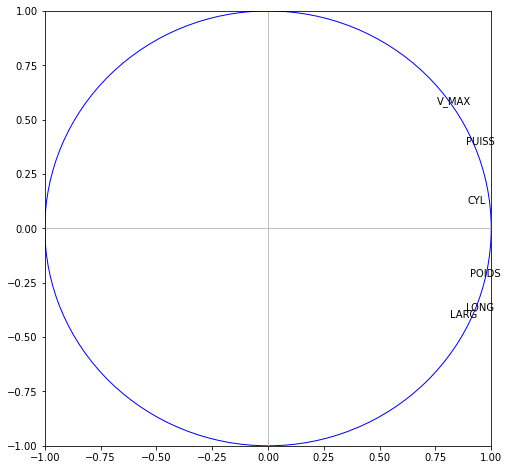

In [48]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
 
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

On perçoit clairement l’effet taille sur le premier axe : les voitures puissantes et rapides sont 
aussi les plus lourdes et imposantes, la relation globale entre les variables est en réalité 
déterminée par la cylindrée (CYL).
